In [2]:
#Loaded Pacakges or libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report

In [3]:
#Load dataset
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\Sql\Ev_spec_2025.csv")
df

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Zeekr,7X Premium RWD,210,71.0,Lithium-ion,NaN,440.0,148,365,6.0,...,2000.0,539,5,RWD,JD - Large,4787,1930,1650,SUV,https://ev-database.org/car/3081/Zeekr-7X-Prem...
474,Zeekr,X Core RWD (MY25),190,49.0,Lithium-ion,NaN,343.0,148,265,5.9,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3197/Zeekr-X-Core-RWD
475,Zeekr,X Long Range RWD (MY25),190,65.0,Lithium-ion,NaN,343.0,146,360,5.6,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3198/Zeekr-X-Long-...
476,Zeekr,X Privilege AWD (MY25),190,65.0,Lithium-ion,NaN,543.0,153,350,3.8,...,1600.0,362,5,AWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3199/Zeekr-X-Privi...


In [4]:
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [6]:
df.describe()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,length_mm,width_mm,height_mm
count,478.000000,478.000000,276.000000,471.000000,478.000000,478.000000,478.000000,477.000000,452.000000,478.000000,478.000000,478.000000,478.000000
mean,185.487448,74.043724,485.293478,498.012739,162.903766,393.179916,6.882636,125.008386,1052.261062,5.263598,4678.506276,1887.359833,1601.125523
std,34.252773,20.331058,1210.819733,241.461128,34.317532,103.287335,2.730696,58.205012,737.851774,1.003961,369.210573,73.656807,130.754851
min,125.000000,21.300000,72.000000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,2.000000,3620.000000,1610.000000,1329.000000
25%,160.000000,60.000000,150.000000,305.000000,143.000000,320.000000,4.800000,80.000000,500.000000,5.000000,4440.000000,1849.000000,1514.000000
50%,180.000000,76.150000,216.000000,430.000000,155.000000,397.500000,6.600000,113.000000,1000.000000,5.000000,4720.000000,1890.000000,1596.000000
75%,201.000000,90.600000,324.000000,679.000000,177.750000,470.000000,8.200000,150.000000,1600.000000,5.000000,4961.000000,1939.000000,1665.000000
max,325.000000,118.000000,7920.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,9.000000,5908.000000,2080.000000,1986.000000


In [7]:
df.isnull().sum()

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

In [8]:
df=df.dropna()
df

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
6,Alfa,Romeo Junior Elettrica 54 kWh,150,50.8,Lithium-ion,102.0,260.0,128,320,9.0,...,0.0,400,5,FWD,JB - Compact,4173,1781,1532,SUV,https://ev-database.org/car/2184/Alfa-Romeo-Ju...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Volvo,EX90 Twin Motor (MY24-26),180,107.0,Lithium-ion,204.0,770.0,188,470,5.9,...,2200.0,310,7,AWD,JF - Luxury,5037,1964,1744,SUV,https://ev-database.org/car/1775/Volvo-EX90-Tw...
457,Volvo,EX90 Twin Motor Performance (MY24-26),180,107.0,Lithium-ion,204.0,910.0,188,455,4.9,...,2200.0,310,7,AWD,JF - Luxury,5037,1964,1744,SUV,https://ev-database.org/car/1776/Volvo-EX90-Tw...
468,Zeekr,001 Long Range RWD,200,94.0,Lithium-ion,110.0,343.0,152,505,7.2,...,1500.0,539,5,RWD,E - Executive,4955,1999,1560,Liftback Sedan,https://ev-database.org/car/1933/Zeekr-001-Lon...
469,Zeekr,001 Performance AWD,200,94.0,Lithium-ion,110.0,686.0,159,480,3.8,...,2000.0,539,5,AWD,E - Executive,4955,1999,1560,Liftback Sedan,https://ev-database.org/car/1934/Zeekr-001-Per...


In [10]:
#Dropped some columns
df2 = df.drop(['brand','number_of_cells','torque_nm','model','segment','range_km','source_url','car_body_type','fast_charging_power_kw_dc','drivetrain','fast_charge_port','acceleration_0_100_s','battery_type','towing_capacity_kg','length_mm','width_mm','height_mm','seats'],axis = 'columns')
df2.head()

,top_speed_kmh,battery_capacity_kWh,efficiency_wh_per_km,cargo_volume_l
0,155,37.8,156,185
1,155,37.8,149,185
2,200,50.8,158,360
3,200,50.8,158,360
6,150,50.8,128,400


In [11]:
print(df2.isnull().sum())

top_speed_kmh           0
battery_capacity_kWh    0
efficiency_wh_per_km    0
cargo_volume_l          0
dtype: int64


#EDA

In [12]:
# # sns.histplot(data=df3, x='top_speed_kmh', kde=True)
# # plt.show()
# num_cols = ['top_speed_kmh', 'acceleration_0_100_s', 'efficiency_wh_per_km', 'battery_capacity_kWh', 'fast_charging_power_kw_dc', 'range_km']

# for col in num_cols:
#     plt.figure(figsize=(6, 4))
#     sns.histplot(df2[col], kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.show()

In [13]:
# for col in num_cols:
#     plt.figure(figsize=(6,4))
#     sns.boxplot(x=df2[col])
#     plt.title
#     plt.show()

In [16]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Boxplot of range by segment
# sns.boxplot(x='segment', y='range_km', data=df2)
# plt.xticks(rotation=45)
# plt.title("EV Range Distribution by Segment")
# plt.show()

In [15]:
# cat_cols = ['segment','range_km']

# for col in cat_cols:
#     plt.figure(figsize=(6,9))
#     sns.countplot(y=col, data=df2, order=df[col].value_counts().index)
#     plt.title(f'count of each {col}')
#     plt.show()

In [17]:
# for col in cat_cols:
#     plt.figure(figsize=(10, 4))
#     sns.barplot(x='range_km', y='segment', data=df2, estimator='mean')
#     plt.title(f'Mean Range by {col}')
#     plt.xticks(rotation=45)
#     plt.show()

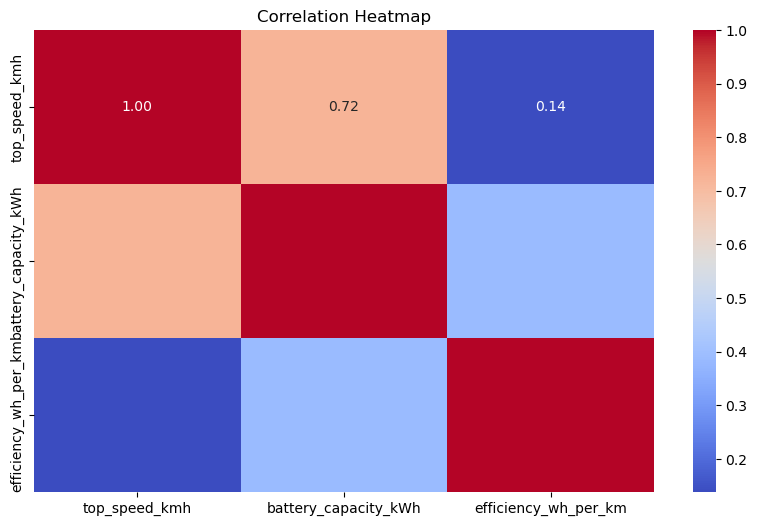

In [18]:
# Correlation matrix
plt.figure(figsize=(10, 6))
corr = df2.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# sns.histplot(df['range_km'], kde=True)
# plt.title('EV Range Distribution')
# plt.show()

# Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['battery_type_encoded'] = le.fit_transform(df['battery_type'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15388\3534584151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['battery_type_encoded'] = le.fit_transform(df['battery_type'])


In [21]:
# df_encoded = pd.get_dummies(df, columns=['brand', 'drivetrain', 'fast_charge_port'], drop_first=True)

In [23]:
df2.info()
df2.head()


<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 0 to 470
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   top_speed_kmh         264 non-null    int64  
 1   battery_capacity_kWh  264 non-null    float64
 2   efficiency_wh_per_km  264 non-null    int64  
 3   cargo_volume_l        264 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 10.3+ KB


,top_speed_kmh,battery_capacity_kWh,efficiency_wh_per_km,cargo_volume_l
0,155,37.8,156,185
1,155,37.8,149,185
2,200,50.8,158,360
3,200,50.8,158,360
6,150,50.8,128,400


#ML Algorithms

In [ ]:
# Start fresh from df
df2_cleaned = df2.copy()

# Drop unnecessary identifier columns
df2_cleaned.drop(columns=['brand', 'model', 'source_url'], inplace=True, errors='ignore')

# One-hot encode 'segment' and 'drivetrain'
df2_cleaned = pd.get_dummies(df2_cleaned, columns=['segment', 'drivetrain'], drop_first=True)

# Remove any non-numeric columns that might still exist
non_numeric_cols = df2_cleaned.select_dtypes(include='object').columns
df2_cleaned.drop(columns=non_numeric_cols, inplace=True)

# Drop rows with missing or non-convertible values
df2_cleaned = df2_cleaned.dropna()

# Split into features and target
X = df2_cleaned.drop(columns=['range_km'])
y = df2_cleaned['range_km']


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Start with the original DataFrame
df_cleaned = df.copy()

# Drop non-informative or identifier columns
df_cleaned.drop(columns=['brand', 'model', 'source_url'], inplace=True, errors='ignore')

# One-hot encode 'segment' and 'drivetrain'
df_cleaned = pd.get_dummies(df_cleaned, columns=['segment', 'drivetrain'], drop_first=True)

# Drop non-numeric columns (e.g., battery_type, fast_charge_port, etc.)
non_numeric = df_cleaned.select_dtypes(include='object').columns
df_cleaned.drop(columns=non_numeric, inplace=True)

# Drop missing values
df_cleaned.dropna(inplace=True)

# Separate features and target
X = df_cleaned.drop(columns=['range_km'])
y = df_cleaned['range_km']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔹 Linear Regression:")
print("R²:", r2_score(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))




🔹 Linear Regression:
R²: 0.9479834716659757
RMSE: 22.0870927984283


In [25]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\n🔹 KNN (k=5):")
print("R²:", r2_score(y_test, y_pred_knn))
print("RMSE:", mean_squared_error(y_test, y_pred_knn, squared=False))




🔹 KNN (k=5):
R²: 0.8200691609396322
RMSE: 41.079076986195


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔹 Linear Regression:")
print("R²:", r2_score(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))


🔹 Linear Regression:
R²: 0.9479834716659757
RMSE: 22.0870927984283


In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🔹 Random Forest:")
print("R²:", r2_score(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))



🔹 Random Forest:
R²: 0.9679330950583859
RMSE: 17.3418887713617


In [28]:
print("\n📈 Model Performance Summary:")
for name, pred in zip(['Linear Regression', 'KNN', 'Random Forest'], 
                      [y_pred_lr, y_pred_knn, y_pred_rf]):
    print(f"{name}: R² = {r2_score(y_test, pred):.3f}, RMSE = {mean_squared_error(y_test, pred, squared=False):.2f}")


📈 Model Performance Summary:
Linear Regression: R² = 0.948, RMSE = 22.09
KNN: R² = 0.820, RMSE = 41.08
Random Forest: R² = 0.968, RMSE = 17.34


In [35]:
new_data = {
    'top_speed_kmh': 260,
    'battery_capacity_kWh': 80,
    'number_of_cells': 200,
    'torque_nm': 300,
    'efficiency_wh_per_km': 180,
    'acceleration_0_100_s': 5.5,
    'fast_charging_power_kw_dc': 100,
    'towing_capacity_kg': 800,
    'cargo_volume_l': 450,
    'seats': 5,
    'length_mm': 1500,
    'width_mm': 2800,
    'height_mm': 1600,
    'car_body_type': 1,  # numeric encoding if needed
    # Assume segment and drivetrain encoded dummies like:
    'segment_C - Medium': 1,
    'drivetrain_RWD': 1,
}


In [36]:
# new_data = {
#     'top_speed_kmh': 200,
#     'battery_capacity_kWh': 85,
#     'number_of_cells': 400,
#     'torque_nm': 500,
#     'efficiency_wh_per_km': 170,
#     'acceleration_0_100_s': 6.2,
#     'fast_charging_power_kw_dc': 150,
#     'towing_capacity_kg': 1200,
#     'cargo_volume_l': 520,
#     'seats': 5,
#     'length_mm': 4800,
#     'width_mm': 1900,
#     'height_mm': 1450,
    
#     # One-hot encoded drivetrain
#     'drivetrain_FWD': 1,
#     'drivetrain_RWD': 0,
    
#     # One-hot encoded segment
#     'segment_B - Compact': 0,
#     'segment_C - Medium': 0,
#     'segment_D - Large': 0,
#     'segment_E - Executive': 1,
#     'segment_F - Luxury': 0,
#     'segment_JB - Compact': 0,
#     'segment_JC - Medium': 0,
#     'segment_JD - Large': 0,
#     'segment_JE - Executive': 0,
#     'segment_JF - Luxury': 0,
#     'segment_N - Passenger Van': 0
# }


In [37]:
import numpy as np
import pandas as pd

# Convert the input to a DataFrame
new_df = pd.DataFrame([new_data])

# Ensure missing dummy columns are added with 0
for col in X.columns:
    if col not in new_df.columns:
        new_df[col] = 0

# Reorder columns to match training data
new_df = new_df[X.columns]

# Scale the input
new_scaled = scaler.transform(new_df)

# Predict with trained models
pred_lr = lr.predict(new_scaled)[0]
pred_knn = knn.predict(new_scaled)[0]
pred_rf = rf.predict(new_scaled)[0]

print(f"\n🔮 Predicted range (km):")
print(f"Linear Regression: {pred_lr:.2f} km")
print(f"KNN: {pred_knn:.2f} km")
print(f"Random Forest: {pred_rf:.2f} km")



🔮 Predicted range (km):
Linear Regression: 145.77 km
KNN: 395.00 km
Random Forest: 416.45 km
